In [12]:
!pip install matplotlib numpy pandas

In [79]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import Conv1D, Dropout, Flatten, Dense

In [22]:
df_tr = pd.read_csv("./bundle_archive/mitbih_train.csv")
df_ts = pd.read_csv("./bundle_archive/mitbih_test.csv")

In [46]:
y_tr = df_tr.iloc[:,-1]
x_tr = df_tr.iloc[:,:-1]

y_ts = df_ts.iloc[:,-1]
x_ts = df_ts.iloc[:,:-1]

In [120]:
y_ts = y_ts.astype(np.int64)
y_tr = y_tr.astype(np.float32)
x_ts = x_ts.astype(np.int64)
y_ts = y_ts.astype(np.float32)

In [68]:
x_tr.shape

(87553, 187)

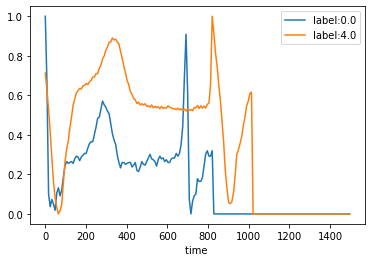

In [67]:
t = np.linspace(0,(187/125)*1000,187)
plt.plot(t,x_tr[y_tr==1].iloc[0], label= f"label:{ y_tr[y_tr==0].iloc[0]}")
plt.plot(t,x_tr[y_tr==4].iloc[0], label= f"label:{ y_tr[y_tr==4].iloc[0]}")
plt.legend()
plt.xlabel("time ")
plt.show()

In [119]:
x_tr_cnn = np.reshape(np.array(x_tr), (x_tr.shape[0], x_tr.shape[1], 1))
x_ts_cnn = np.reshape(np.array(x_ts), (x_ts.shape[0], x_ts.shape[1], 1))

In [129]:
model = models.Sequential()
model.add(layers.Conv1D(filters= 64, kernel_size= 6, activation='relu' ))
# model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile( loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [130]:
model.fit(x_tr_cnn, y_tr, batch_size= 32, epochs= 2, verbose= 1)

Epoch 1/2
2737/2737 [==============================] - 59s 21ms/step - loss: 0.1947 - accuracy: 0.9457
Epoch 2/2
2737/2737 [==============================] - 58s 21ms/step - loss: 0.1094 - accuracy: 0.9698


In [131]:
y_ts_pred = model.predict(x_ts_cnn, verbose=1)
y_tr_pred = model.predict(x_tr_cnn, verbose=1)

2737/2737 [==============================] - 13s 5ms/step


In [275]:
from sklearn.metrics import classification_report

df = pd.DataFrame(y_tr_pred)
clf_rep = classification_report(y_tr,np.array(df.idxmax(axis=1)))
print("train :" + clf_rep)

df = pd.DataFrame(y_ts_pred)
clf_rep = classification_report(y_ts,np.array(df.idxmax(axis=1)))
print("test :" + clf_rep)

train :              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     72470
         1.0       0.93      0.65      0.77      2223
         2.0       0.94      0.92      0.93      5788
         3.0       0.88      0.50      0.63       641
         4.0       0.99      0.96      0.97      6431

    accuracy                           0.98     87553
   macro avg       0.94      0.80      0.86     87553
weighted avg       0.97      0.98      0.97     87553

test :              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     18117
         1.0       0.12      0.04      0.06       556
         2.0       0.27      0.00      0.01      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.31      0.43      0.36      1608

    accuracy                           0.80     21891
   macro avg       0.31      0.28      0.26     21891
weighted avg       0.76      0.80      0.77     21891



C:\Users\Asus\anaconda3\envs\tensorflow-sessions\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\envs\tensorflow-sessions\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\envs\tensorflow-sessions\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta